In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
%matplotlib inline

In [7]:
#importing of dataset

df = pd.read_csv("/content/crop_production.csv")
df

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
0,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Arecanut,1254.0,2000.0
1,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Other Kharif pulses,2.0,1.0
2,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Rice,102.0,321.0
3,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Banana,176.0,641.0
4,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Cashewnut,720.0,165.0
...,...,...,...,...,...,...,...
246086,West Bengal,PURULIA,2014,Summer,Rice,306.0,801.0
246087,West Bengal,PURULIA,2014,Summer,Sesamum,627.0,463.0
246088,West Bengal,PURULIA,2014,Whole Year,Sugarcane,324.0,16250.0
246089,West Bengal,PURULIA,2014,Winter,Rice,279151.0,597899.0


In [8]:
req = list(set((df["State_Name"].tolist())))
length = [i for i in range(len(list(set((df["State_Name"].tolist())))))]
res = {}
for key in req:
  for value in length:
    res[key] = value
    length.remove(value)
    break
res

{'Uttar Pradesh': 0,
 'Mizoram': 1,
 'Himachal Pradesh': 2,
 'Puducherry': 3,
 'Maharashtra': 4,
 'Gujarat': 5,
 'West Bengal': 6,
 'Rajasthan': 7,
 'Meghalaya': 8,
 'Odisha': 9,
 'Tripura': 10,
 'Chandigarh': 11,
 'Chhattisgarh': 12,
 'Jammu and Kashmir ': 13,
 'Assam': 14,
 'Jharkhand': 15,
 'Punjab': 16,
 'Nagaland': 17,
 'Goa': 18,
 'Telangana ': 19,
 'Manipur': 20,
 'Uttarakhand': 21,
 'Karnataka': 22,
 'Dadra and Nagar Haveli': 23,
 'Arunachal Pradesh': 24,
 'Sikkim': 25,
 'Madhya Pradesh': 26,
 'Kerala': 27,
 'Andhra Pradesh': 28,
 'Tamil Nadu': 29,
 'Haryana': 30,
 'Andaman and Nicobar Islands': 31,
 'Bihar': 32}

In [9]:
mod_df = df
l = mod_df.columns.tolist()
for i in l:
  df1 = []
  req = list(set((mod_df[i].tolist())))
  length = [i for i in range(len(list(set((mod_df[i].tolist())))))]
  res = {}
  for key in req:
    for value in length:
      res[key] = value
      length.remove(value)
      break
  for j in mod_df[i]:
    if type(j) == str:
      required = res[j]
      df1.append(required)
  if len(df1)>0:
    mod_df[i] = df1
  df1 = []


In [5]:
mod_df

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
0,31,239,2000,1,44,1254.0,2000.0
1,31,239,2000,1,103,2.0,1.0
2,31,239,2000,1,90,102.0,321.0
3,31,239,2000,0,100,176.0,641.0
4,31,239,2000,0,80,720.0,165.0
...,...,...,...,...,...,...,...
246086,6,14,2014,4,90,306.0,801.0
246087,6,14,2014,4,73,627.0,463.0
246088,6,14,2014,0,59,324.0,16250.0
246089,6,14,2014,5,90,279151.0,597899.0


In [10]:
#Train and test dataset creation
x = mod_df.drop(["State_Name", "Season"], axis = 1)
y = mod_df["Season"]
print(x)

        District_Name  Crop_Year  Crop      Area  Production
0                 239       2000    44    1254.0      2000.0
1                 239       2000   103       2.0         1.0
2                 239       2000    90     102.0       321.0
3                 239       2000   100     176.0       641.0
4                 239       2000    80     720.0       165.0
...               ...        ...   ...       ...         ...
246086             14       2014    90     306.0       801.0
246087             14       2014    73     627.0       463.0
246088             14       2014    59     324.0     16250.0
246089             14       2014    90  279151.0    597899.0
246090             14       2014    73     175.0        88.0

[246091 rows x 5 columns]


In [11]:
#train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [12]:
#removing nan values

X_train = np.nan_to_num(X_train)
X_test = np.nan_to_num(X_test)

In [13]:
#normalization or scaling

from sklearn.preprocessing import StandardScaler
X_train = StandardScaler().fit_transform(X_train)
X_test = StandardScaler().fit_transform(X_test)

In [14]:
#decision tree using entropy
from sklearn.tree import DecisionTreeClassifier


clf_entropy = DecisionTreeClassifier(criterion='entropy', max_depth = 3, random_state=0)
clf_entropy.fit(X_train, Y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

In [15]:
#prediction of the decision tree for test data
Y_pred = clf_entropy.predict(X_test)
Y_pred

array([1, 0, 1, ..., 1, 1, 2])

In [16]:
#accuracy score of the decision tree
from sklearn.metrics import accuracy_score
print('Model accuracy score with criterion entropy: {0:0.4f}'. format(accuracy_score(Y_test, Y_pred)))

Model accuracy score with criterion entropy: 0.6064


In [17]:
#checking the decision tree's accuracy in the training data
Y_train_pred = clf_entropy.predict(X_train)

#accuracy score of the decision tree for the train data
print('Model accuracy score with criterion entropy: {0:0.4f}'. format(accuracy_score(Y_train, Y_train_pred)))

Model accuracy score with criterion entropy: 0.6057


In [18]:
#comparing the model's train and test scores

print('Training set score: {:.4f}'.format(clf_entropy.score(X_train, Y_train)))
print('Test set score: {:.4f}'.format(clf_entropy.score(X_test, Y_test)))

Training set score: 0.6057
Test set score: 0.6064


# **Confusion Matrix**

A confusion matrix is a tool for summarizing the performance of a classification algorithm. A confusion matrix will give us a clear picture of classification model performance and the types of errors produced by the model. It gives us a summary of correct and incorrect predictions broken down by each category. The summary is represented in a tabular form.

Four types of outcomes are possible while evaluating a classification model performance. These four outcomes are described below:-

True Positives (TP) – True Positives occur when we predict an observation belongs to a certain class and the observation actually belongs to that class.

True Negatives (TN) – True Negatives occur when we predict an observation does not belong to a certain class and the observation actually does not belong to that class.

False Positives (FP) – False Positives occur when we predict an observation belongs to a certain class but the observation actually does not belong to that class. This type of error is called Type I error.

False Negatives (FN) – False Negatives occur when we predict an observation does not belong to a certain class but the observation actually belongs to that class. This is a very serious error and it is called Type II error.

In [19]:
#confusion matrix for the test

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(Y_test, Y_pred)
print('Confusion matrix\n\n', cm)

Confusion matrix

 [[ 5183  5243   958     0     0     0]
 [  871 17576   805     0     0     0]
 [  670  5648  7087     0     0     0]
 [    6   969     1     0     0     0]
 [   24  2833   116     0     0     0]
 [  203   851   175     0     0     0]]


In [20]:
#Accuracy check using classification report

from sklearn.metrics import classification_report

print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.75      0.46      0.57     11384
           1       0.53      0.91      0.67     19252
           2       0.78      0.53      0.63     13405
           3       0.00      0.00      0.00       976
           4       0.00      0.00      0.00      2973
           5       0.00      0.00      0.00      1229

    accuracy                           0.61     49219
   macro avg       0.34      0.32      0.31     49219
weighted avg       0.59      0.61      0.56     49219



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[Text(0.5, 0.875, 'X[2] <= -1.076\nentropy = 2.02\nsamples = 196872\nvalue = [45921, 76699, 53582, 3973, 11868, 4829]'),
 Text(0.25, 0.625, 'X[2] <= -1.627\nentropy = 1.496\nsamples = 37105\nvalue = [6381, 5293, 23919, 319, 691, 502]'),
 Text(0.125, 0.375, 'X[2] <= -1.714\nentropy = 1.982\nsamples = 6699\nvalue = [2743, 2258, 936, 313, 301, 148]'),
 Text(0.0625, 0.125, 'entropy = 0.948\nsamples = 2956\nvalue = [2321, 173, 456, 0, 6, 0]'),
 Text(0.1875, 0.125, 'entropy = 1.978\nsamples = 3743\nvalue = [422, 2085, 480, 313, 295, 148]'),
 Text(0.375, 0.375, 'X[2] <= -1.192\nentropy = 1.161\nsamples = 30406\nvalue = [3638, 3035, 22983, 6, 390, 354]'),
 Text(0.3125, 0.125, 'entropy = 0.878\nsamples = 23335\nvalue = [841, 2149, 19653, 0, 340, 352]'),
 Text(0.4375, 0.125, 'entropy = 1.479\nsamples = 7071\nvalue = [2797, 886, 3330, 6, 50, 2]'),
 Text(0.75, 0.625, 'X[2] <= 0.055\nentropy = 2.003\nsamples = 159767\nvalue = [39540, 71406, 29663, 3654, 11177, 4327]'),
 Text(0.625, 0.375, 'X[2] <= 

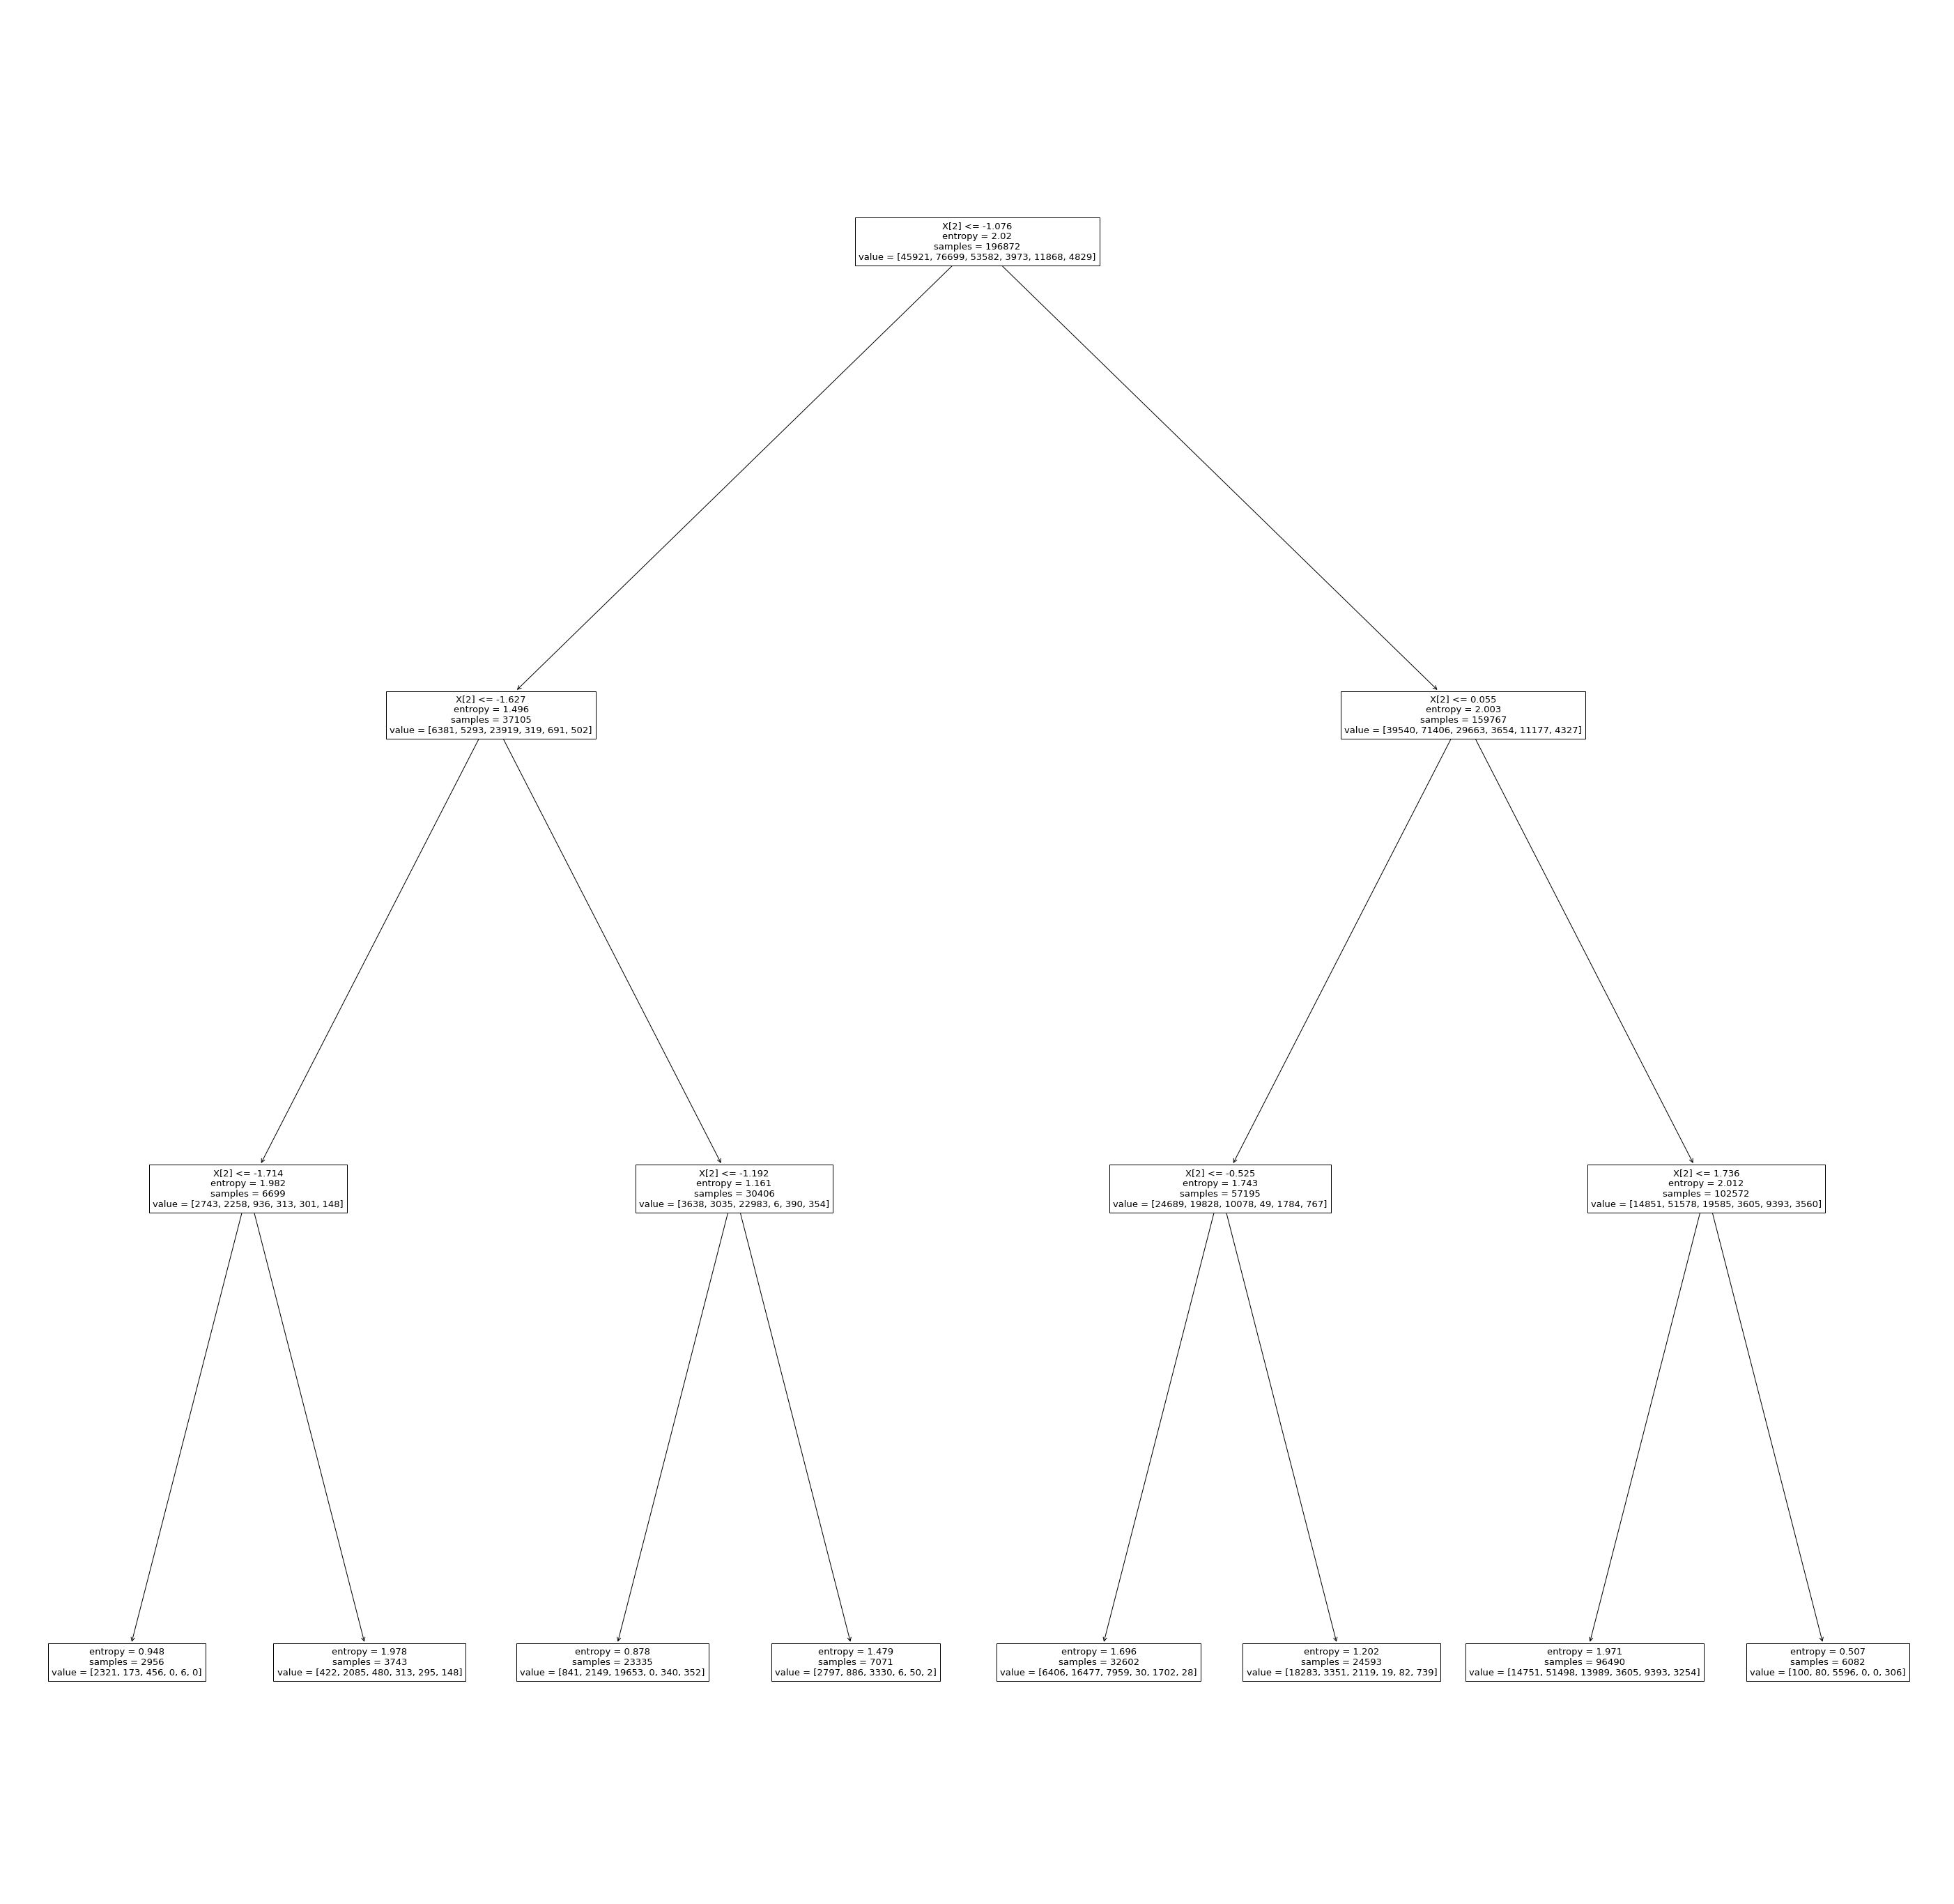

In [21]:
#visualize the decision tree

plt.figure(figsize=(50, 50))

from sklearn import tree

tree.plot_tree(clf_entropy.fit(X_train, Y_train))